In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sales Data

In [4]:
#Read Dataset and Get Inital few rows and Dataset dataType information
salesData = pd.read_csv('sales-train.csv')

In [6]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
salesData.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [9]:
# Check for missing values
missing_values = salesData.isnull().sum()
has_nan = salesData.isnull().values.any()


print("Missing Values in Sales Data \n", missing_values)
print("\n\nNaN Values in Sales Data \n", has_nan)

Missing Values in Sales Data 
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


NaN Values in Sales Data 
 False


In [14]:
salesData.groupby('store_nbr')['sales'].sum().reset_index()

,store_nbr,sales
0,1,1.414501e+07
1,2,2.155739e+07
2,3,5.048191e+07
3,4,1.890970e+07
4,5,1.559240e+07
5,6,2.518368e+07
6,7,2.695205e+07
7,8,3.049429e+07
8,9,2.640944e+07
9,10,9.613906e+06


In [17]:
family_counts = salesData['family'].value_counts().reset_index()
family_counts.columns = ['family', 'count']
family_counts

,family,count
0,AUTOMOTIVE,90936
1,HOME APPLIANCES,90936
2,SCHOOL AND OFFICE SUPPLIES,90936
3,PRODUCE,90936
4,PREPARED FOODS,90936
5,POULTRY,90936
6,PLAYERS AND ELECTRONICS,90936
7,PET SUPPLIES,90936
8,PERSONAL CARE,90936
9,MEATS,90936


In [25]:
#Ensuring that no value is null
salesData[salesData['store_nbr'] == 0]

,id,date,store_nbr,family,sales,onpromotion


In [32]:
salesData['date'] = pd.to_datetime(salesData['date'])

salesData['year'] = salesData['date'].dt.year
# Group by the year and calculate the sum of sales
print("Year wise sales sum\n\n",salesData.groupby('year')['sales'].sum().sort_values(ascending=False))

Year wise sales sum

 year
2016    2.886545e+08
2015    2.408801e+08
2014    2.094742e+08
2017    1.942171e+08
2013    1.404190e+08
Name: sales, dtype: float64


In [34]:
salesData['date'] = pd.to_datetime(salesData['date'])

specific_year = 2013

# Filter the data for the specific year
data_specific_year = salesData[salesData['date'].dt.year == specific_year]

# Extract the month from the 'date' column
data_specific_year['month'] = data_specific_year['date'].dt.month

# Group by the month and calculate the sum of sales
print("Monthly sales of 2016 are: \n\n",data_specific_year.groupby('month')['sales'].sum().reset_index())


Monthly sales of 2016 are: 

     month         sales
0       1  1.032762e+07
1       2  9.658960e+06
2       3  1.142850e+07
3       4  1.099346e+07
4       5  1.159770e+07
5       6  1.168934e+07
6       7  1.125740e+07
7       8  1.173779e+07
8       9  1.179293e+07
9      10  1.177562e+07
10     11  1.235656e+07
11     12  1.580312e+07


/var/folders/81/wffr_1x51057xcbrk0fqdd540000gn/T/ipykernel_69931/4074048100.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_specific_year['month'] = data_specific_year['date'].dt.month


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


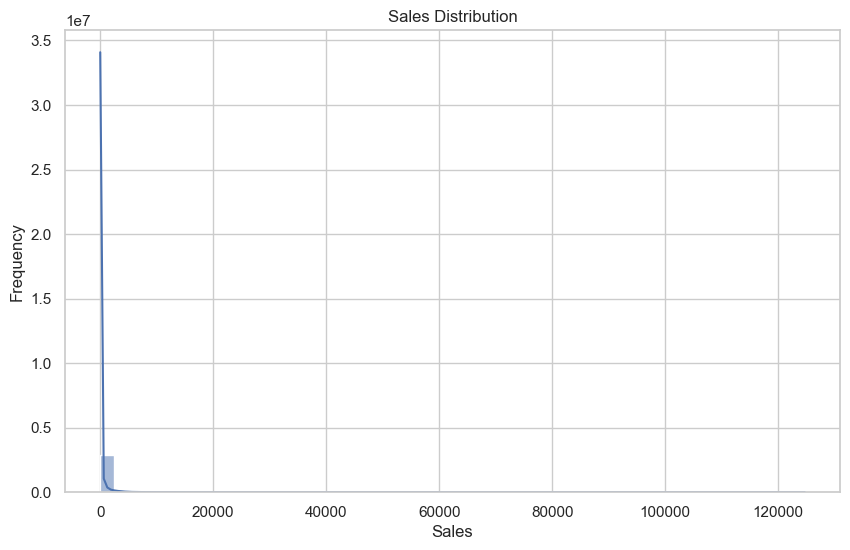

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


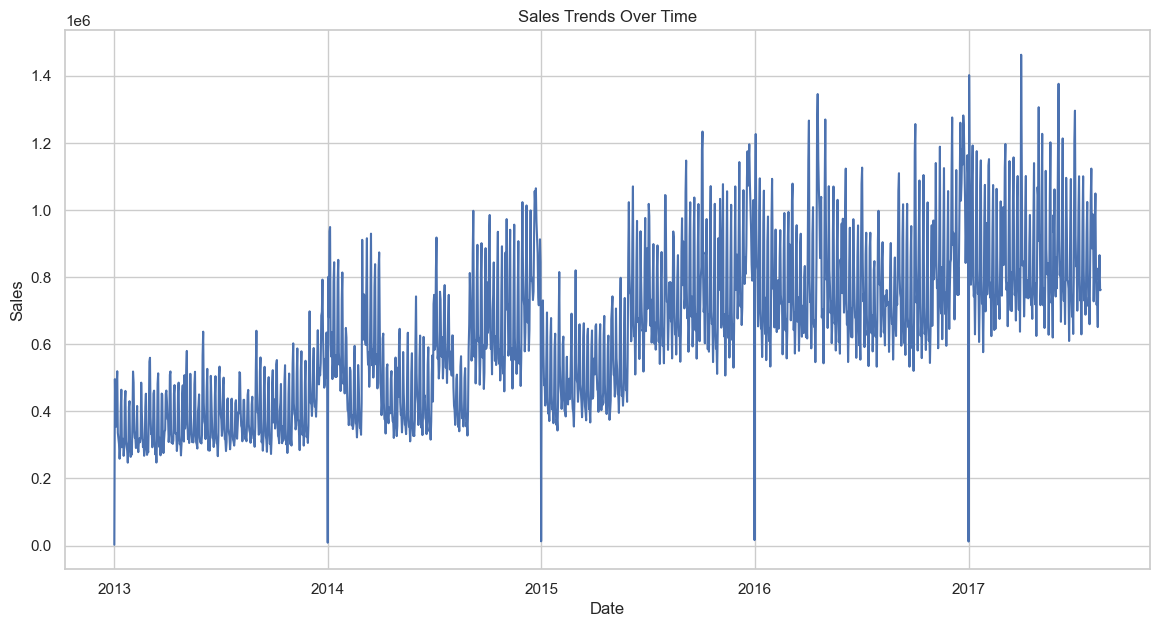

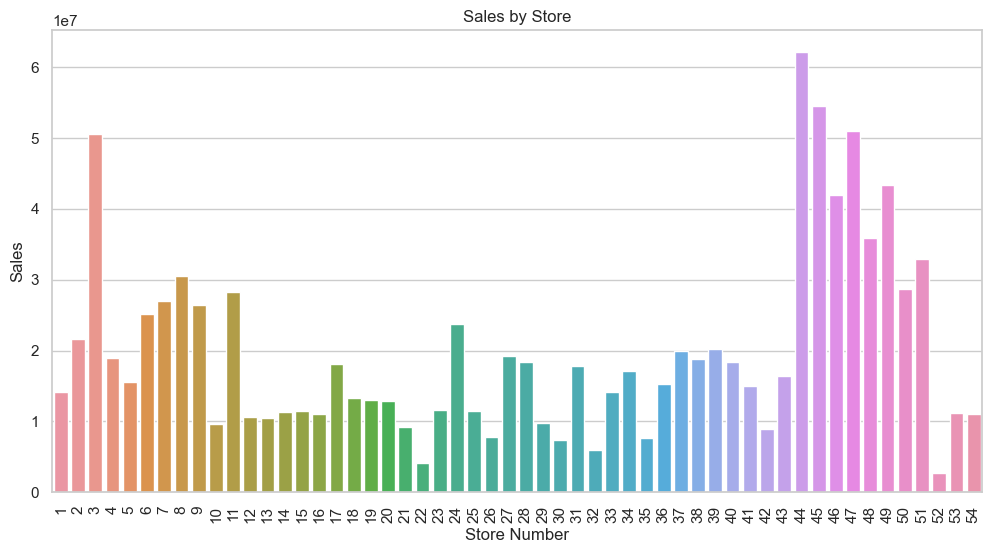

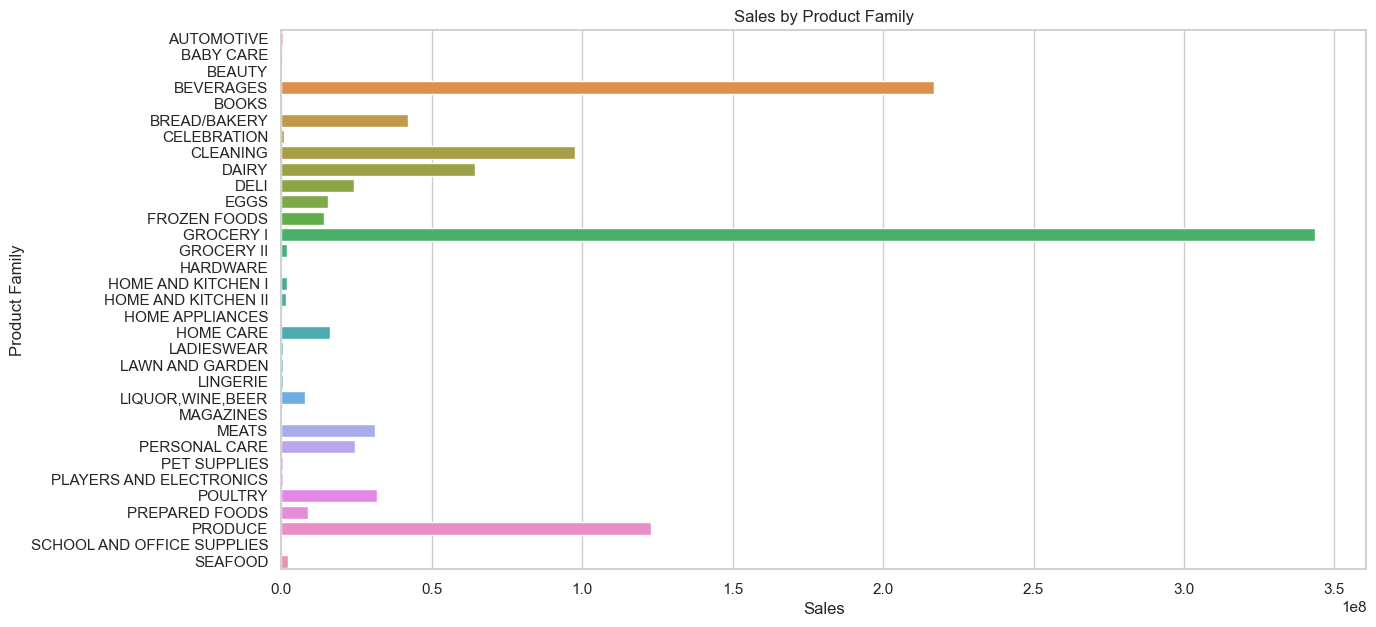

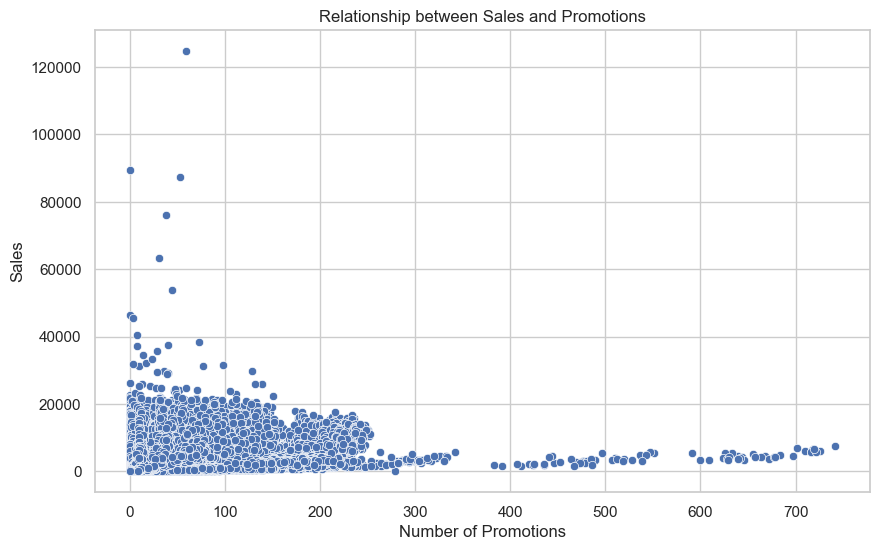

In [27]:
# Set the style for the plots
sns.set(style="whitegrid")

# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(salesData['sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Sales trends over time
salesData['date'] = pd.to_datetime(salesData['date'])
sales_trends = salesData.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_trends, x='date', y='sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Sales by store
sales_by_store = salesData.groupby('store_nbr')['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_store, x='store_nbr', y='sales')
plt.title('Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

# Sales by product family
sales_by_family = salesData.groupby('family')['sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_family, x='sales', y='family')
plt.title('Sales by Product Family')
plt.xlabel('Sales')
plt.ylabel('Product Family')
plt.show()

# Relationship between sales and promotions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salesData, x='onpromotion', y='sales')
plt.title('Relationship between Sales and Promotions')
plt.xlabel('Number of Promotions')
plt.ylabel('Sales')
plt.show()
